### Basic forward-design example
Demonstrate the basic input format that can be used for forward design.
Designs can have fused regions and holes, specified by the `fusedPts` and `holePts`, respectively.

The provided design doesn't do anything interesting...

In [8]:
import sys; sys.path.append('..')
import inflation, mesh, sheet_meshing
from tri_mesh_viewer import TriMeshViewer as Viewer
import triangulation
import numpy as np
import utils, py_newton_optimizer, benchmark
import matplotlib.pyplot as plt

In [9]:
V, E = mesh.load_raw('data/ForwardDesign/example.obj')
fusedPts = list(np.loadtxt('data/ForwardDesign/example_fusedPts.txt').reshape((-1, 2)))
holePts  = list(np.loadtxt('data/ForwardDesign/example_holePts.txt').reshape((-1, 2)))

In [10]:
m, iwv, iwbv = sheet_meshing.forward_design_mesh(V, E, fusedPts, holePts, np.prod(utils.bbox_dims(V)[0:2]) / 1e4)
isheet = inflation.InflatableSheet(m, iwv)

Detected 1 holes


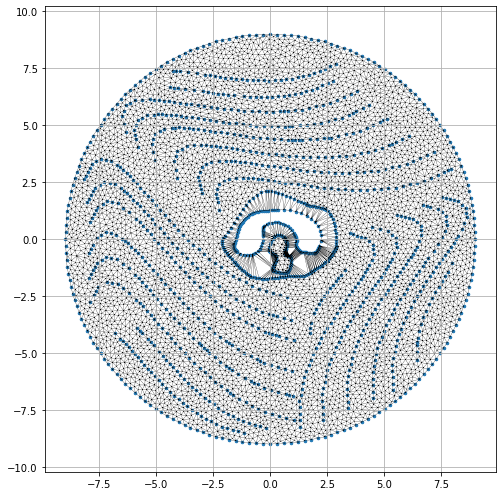

In [11]:
import visualization
visualization.plot_2d_mesh(m, pointList=np.where(iwv))
# Add grid
plt.grid(True)
plt.show()

In [5]:
viewer = Viewer(isheet, wireframe=True)
viewer.show()

Renderer(camera=PerspectiveCamera(children=(PointLight(color='#999999', position=(0.0, 0.0, 5.0), quaternion=(…

In [6]:
import time
benchmark.reset()
isheet.setUseTensionFieldEnergy(True)
isheet.setUseHessianProjectedEnergy(False)
opts = py_newton_optimizer.NewtonOptimizerOptions()
opts.niter = 500
isheet.pressure = 1
framerate = 5 # Update every 5 iterations
def cb(it):
    if it % framerate == 0:
        viewer.update()
cr = inflation.inflation_newton(isheet, isheet.rigidMotionPinVars, opts, callback=cb)
benchmark.report()

InflatableSheet setVars	0.0033741	1
Newton iterations	238.021	1
    InflatableSheet energy	0.000380039	1
    InflatableSheet gradient	0.000957012	1
    Newton iterate	238.005	500
        Backtracking	2.9428	500
            InflatableSheet energy	0.592985	885
            InflatableSheet setVars	2.3031	885
        Compute descent direction	227.408	500
            Negative curvature dir	65.188	167
                negativeCurvatureDirection	64.8912	167
                    CHOLMOD Backsub	57.3183	32565
                    CHOLMOD Numeric Factorize	0.135812	167
                    CHOLMOD Symbolic Factorize	1.27682	167
            newton_step	162.211	500
                Newton solve	150.207	893
                    CHOLMOD Numeric Factorize	143.937	892
                    Solve	3.10725	501
                        CHOLMOD Backsub	2.8031	500
                        CHOLMOD Numeric Factorize	0.0519378	1
                        CHOLMOD Symbolic Factorize	0.198573	1
                hessEval	11.506